In [1]:
!git clone https://github.com/jpalastus/Notebooks.git

fatal: destination path 'Notebooks' already exists and is not an empty directory.


In [2]:
!pip install ase dscribe

-------------------------------------------------------------------------
# Clustering data from MD


In [3]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import TSNE, locally_linear_embedding
from sklearn.decomposition import PCA
import numpy as np

X = np.load('/content/Notebooks/Oleron Solidification School 2024/data/MD_melting/mbtr_copper.npy')
X=X[1:]
##### FOR SILICON USE
#X = np.load('/content/lmbtr_nuclation_2-4.npy')

1000


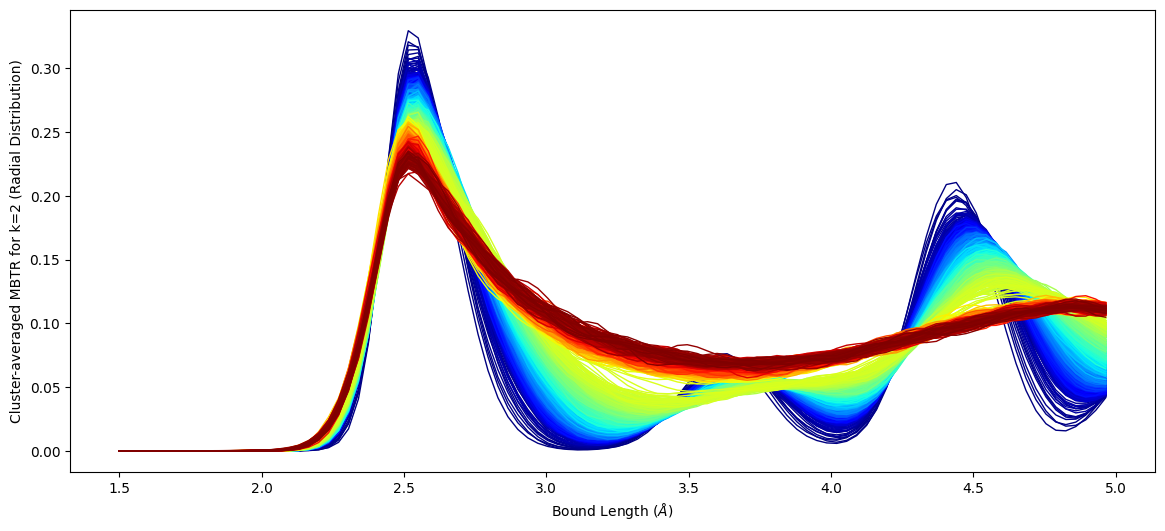

In [4]:
from matplotlib import cm,colormaps

N=len(X)
print(N)
cmap = colormaps['jet']
colours=[cmap(float(i)/float(N-1)) for i in range(N)]

xmin=1.5; xmax=5.0
##### FOR SILICON USE
#xmin=2.0; xmax=4.0

plt.figure(figsize=(14, 6))
plt.xlabel("Bound Length ($\AA$)")
plt.ylabel("Cluster-averaged MBTR for k=2 (Radial Distribution)")
for i in range(1,len(X)):
  xx=X[i]#+0.001*i
  N=len(xx)
  xx_plot=(np.array(range(N))/float(N))*(xmax-xmin)+xmin
  plt.plot(xx_plot, xx,'-', linewidth=1, c = colours[i])


plt.show()

2


<ipython-input-5-ab2d1c397749>:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap(cm_preference)


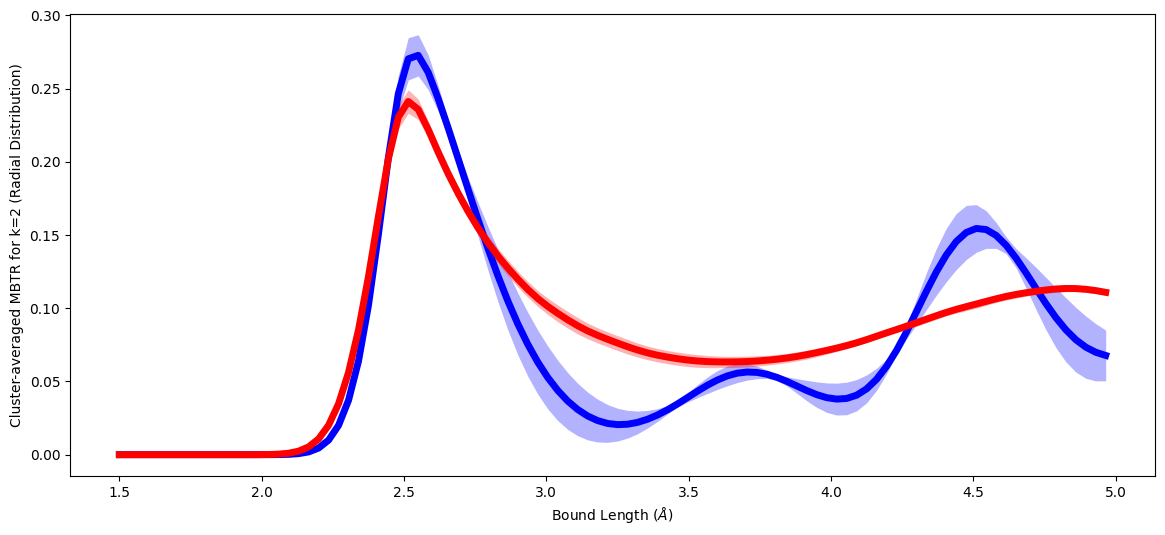

In [5]:
from sklearn.cluster import KMeans, DBSCAN
import matplotlib
cm_preference='bwr'

##### FOR SILICON USE
#cm_preference='jet'
#nb_c = 5
#model = KMeans(n_clusters=nb_c
#               , init='random'
#               , n_init=100
#               , max_iter=1000
#               , tol=1e-04
#              )
model = DBSCAN(eps=0.20,
               min_samples=10,
               metric='l1')

model.fit(X)

y_pred = model.labels_
nb_c=max(y_pred)+1

print(nb_c)

cmap = matplotlib.cm.get_cmap(cm_preference)
colours=[cmap(float(i)/float(nb_c-1)) for i in range(nb_c)]

xmin=1.5; xmax=5.0

plt.figure(figsize=(14, 6))
plt.xlabel("Bound Length ($\AA$)")
plt.ylabel("Cluster-averaged MBTR for k=2 (Radial Distribution)")
for i in range(nb_c):
  aux=X[y_pred==i]
  xx=np.mean(np.array(aux), axis=0)
  N=len(xx)
  xx_plot=(np.array(range(N))/float(N))*(xmax-xmin)+xmin
  plt.plot(xx_plot, xx,'-', linewidth=5, c = colours[i])
  std=np.std(np.array(aux), axis=0)
  plt.fill_between(xx_plot, xx-std, xx+std, alpha=.3, linewidth=0, color = colours[i])
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


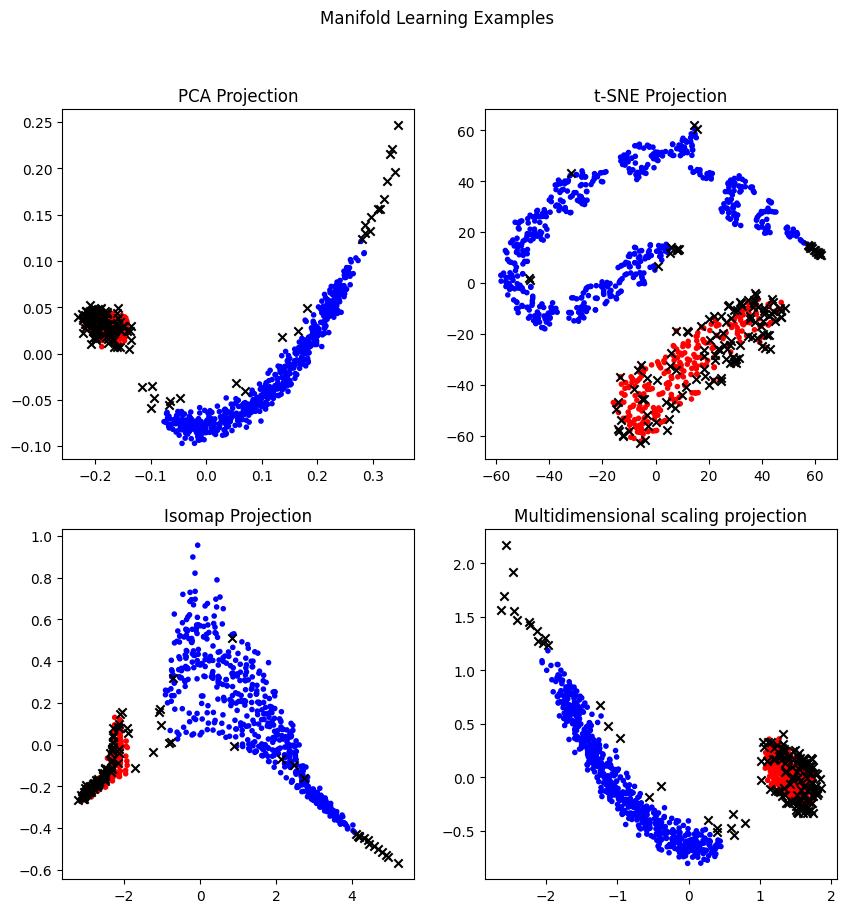

In [6]:
from sklearn.manifold import TSNE, Isomap, MDS
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import manhattan_distances


fig, axs = plt.subplots(2, 2,figsize=(10, 10))
fig.suptitle('Manifold Learning Examples')

# PCA
X_pca = PCA(n_components=2).fit_transform(X)
axs[0,0].scatter(X_pca[y_pred!=-1][:, 0], X_pca[y_pred!=-1][:,1], marker='.', c = y_pred[y_pred!=-1], cmap=cm_preference)
axs[0,0].scatter(X_pca[y_pred==-1][:, 0], X_pca[y_pred==-1][:,1], marker='x', c = 'k')
axs[0,0].set_title("PCA Projection")


# TSNE
X_tsne = TSNE(n_components=2, perplexity=10,early_exaggeration=50,metric="l1").fit_transform(X)
axs[0,1].scatter(X_tsne[y_pred!=-1][:, 0], X_tsne[y_pred!=-1][:,1], marker='.', c = y_pred[y_pred!=-1], cmap=cm_preference)
axs[0,1].scatter(X_tsne[y_pred==-1][:, 0], X_tsne[y_pred==-1][:,1], marker='x', c = 'k')
axs[0,1].set_title("t-SNE Projection")

# Isomap
X_isomap = Isomap(n_components=2,n_neighbors=10,metric="l1").fit_transform(X)
axs[1,0].scatter(X_isomap[y_pred!=-1][:, 0], X_isomap[y_pred!=-1][:,1], marker='.', c = y_pred[y_pred!=-1], cmap=cm_preference)
axs[1,0].scatter(X_isomap[y_pred==-1][:, 0], X_isomap[y_pred==-1][:,1], marker='x', c = 'k')
axs[1,0].set_title("Isomap Projection")

# Multidimensional scaling
M=manhattan_distances(X)
X_mds = MDS(n_components=2,dissimilarity='precomputed').fit_transform(M)
axs[1,1].scatter(X_mds[y_pred!=-1][:, 0], X_mds[y_pred!=-1][:,1], marker='.', c = y_pred[y_pred!=-1], cmap=cm_preference)
axs[1,1].scatter(X_mds[y_pred==-1][:, 0], X_mds[y_pred==-1][:,1], marker='x', c = 'k')
axs[1,1].set_title("Multidimensional scaling projection")

fig.show()


# Checking some nanoclusters (Dont look that nice...)

explained variance ratio (first two components): [0.68284626 0.13259963]


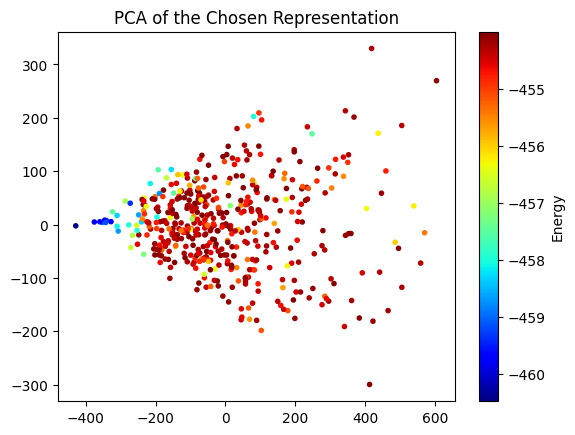

In [7]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np

y = np.load('/content/Notebooks/Oleron Solidification School 2024/data/Cu147_nanoclusters/energies.npy')
#X = np.load('/content/Notebooks/Oleron Solidification School 2024/data/Cu147_nanoclusters/mbtr.npy')
X = np.load('/content/Notebooks/Oleron Solidification School 2024/data/Cu147_nanoclusters/cm.npy')
X=X[y<-454]
y=y[y<-454]

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
dist=plt.scatter(X_r[:,0], X_r[:,1], marker='.', c=y, cmap='jet')
plt.title("PCA of the Chosen Representation")
cbar = plt.colorbar(dist)
cbar.set_label('Energy', rotation=90)
plt.show()


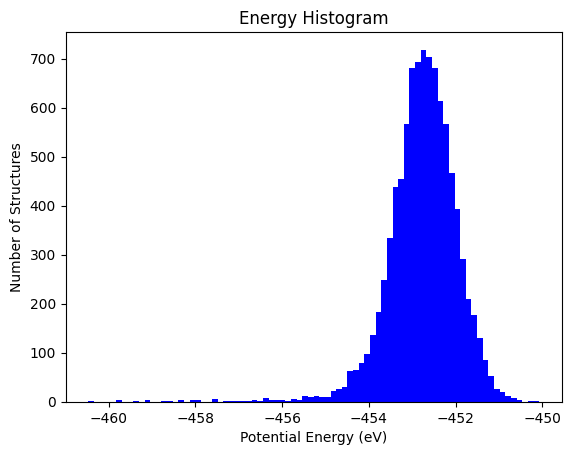

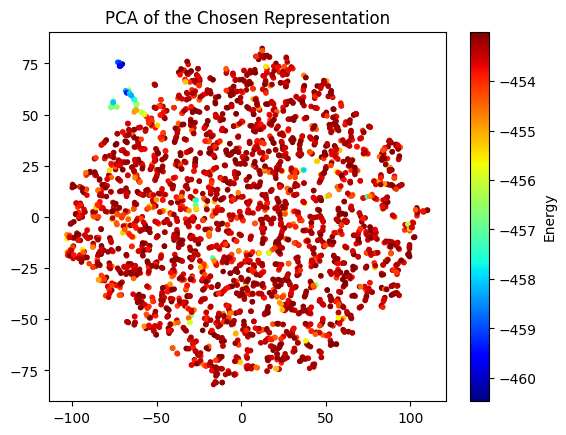

In [8]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import TSNE, locally_linear_embedding
import numpy as np

##LOADING FILES
#X = np.load('/content/Notebooks/Oleron Solidification School 2024/data/Cu147_nanoclusters/mbtr.npy')
X = np.load('/content/Notebooks/Oleron Solidification School 2024/data/Cu147_nanoclusters/cm.npy')
y = np.load('/content/Notebooks/Oleron Solidification School 2024/data/Cu147_nanoclusters/energies.npy')

#Checking the energy distribution
fig, ax = plt.subplots()
ax.set_title("Energy Histogram")
ax.set_xlabel("Potential Energy (eV)")
ax.set_ylabel("Number of Structures")
N, bins, patches = ax.hist(y, bins=80, color="b")
plt.show()


#Lets try to visualize some of the data....
X=X[y<-453]
y=y[y<-453]
#X_r, _ = locally_linear_embedding(X,n_neighbors=50, n_components=2)
X_r = TSNE(n_components=2,perplexity=5,early_exaggeration=10).fit_transform(X)

plt.figure()
dist=plt.scatter(X_r[:,0], X_r[:,1], marker='.', c=y, cmap='jet')
plt.title("PCA of the Chosen Representation")
cbar = plt.colorbar(dist)
cbar.set_label('Energy', rotation=90)
plt.show()

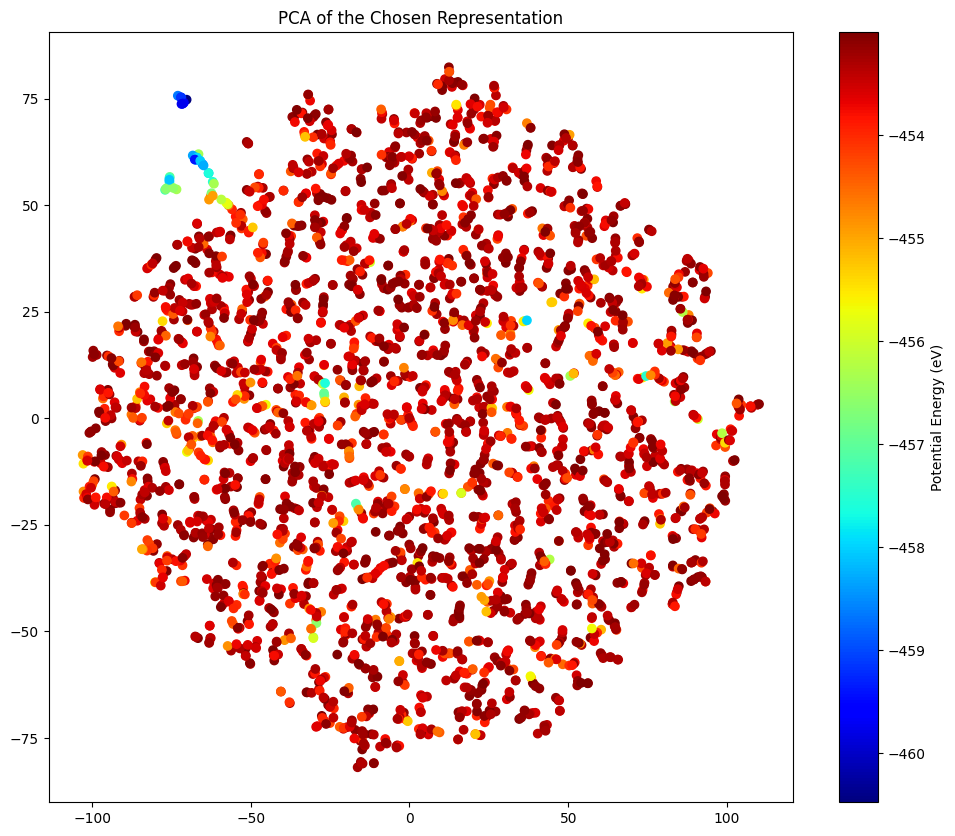

In [9]:

plt.figure(figsize=(12,10))
dist=plt.scatter(X_r[:,0], X_r[:,1], marker='o', c=y, cmap='jet')
plt.title("PCA of the Chosen Representation")
cbar = plt.colorbar(dist)
cbar.set_label('Potential Energy (eV)', rotation=90)
plt.show()
